In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')
color_pel = sns.color_palette()


In [2]:
df = pd.read_csv('PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [4]:
df = df.set_index('Datetime')
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [5]:
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, 'Energy')

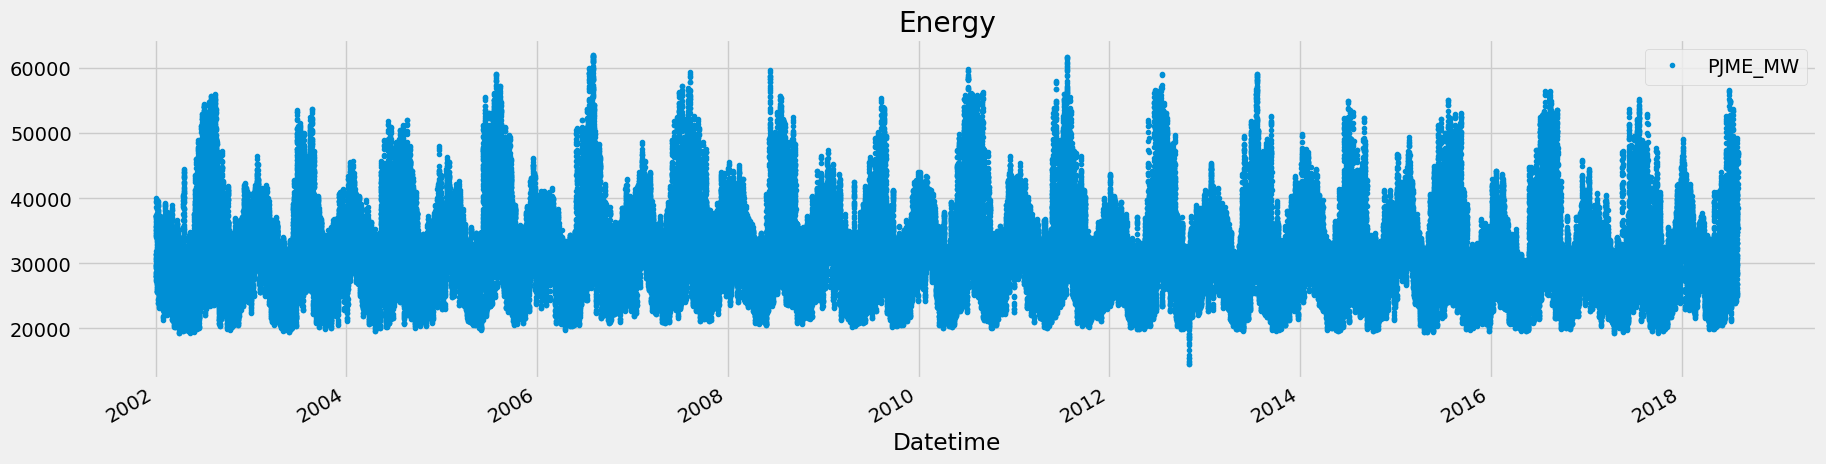

In [6]:
df.plot(figsize=(20,5),style='.',color=color_pel[0])
plt.title('Energy')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


Features Engineering

In [8]:
df['hour']=df.index.hour
df['days of week']=df.index.dayofweek
df['month']=df.index.month
df['quarter']=df.index.quarter
df['year']=df.index.year
df['days of year']=df.index.dayofyear
df.head()

,PJME_MW,hour,days of week,month,quarter,year,days of year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


Text(0.5, 1.0, 'Energy usage by hour')

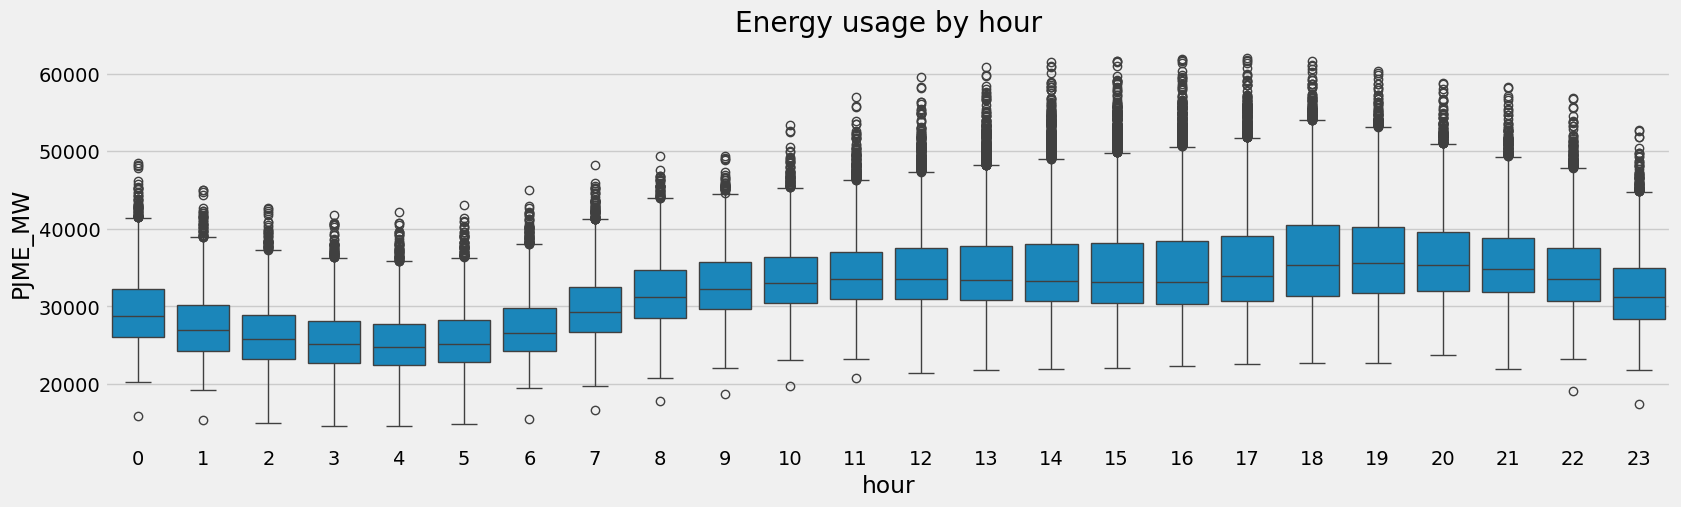

In [9]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=df,x='hour',y='PJME_MW')
plt.title('Energy usage by hour')

Text(0.5, 1.0, 'Energy usage by days of week')

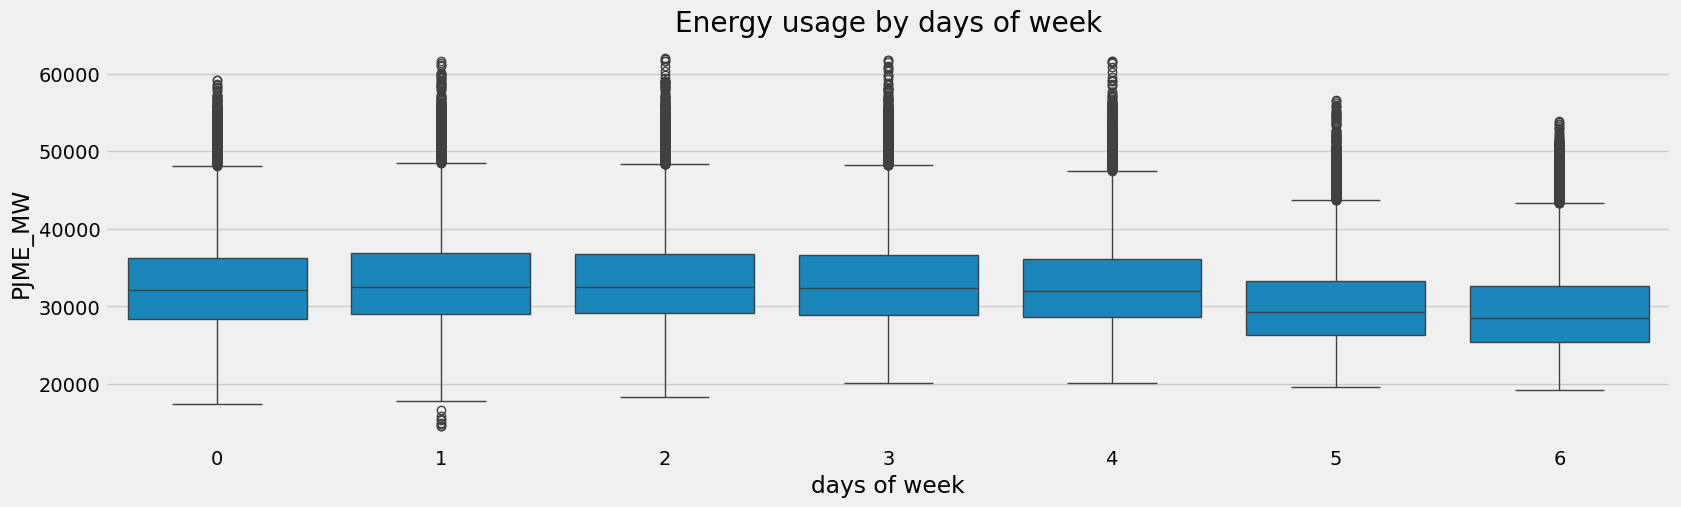

In [10]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=df,x='days of week',y='PJME_MW')
plt.title('Energy usage by days of week')

Text(0.5, 1.0, 'Energy usage by month')

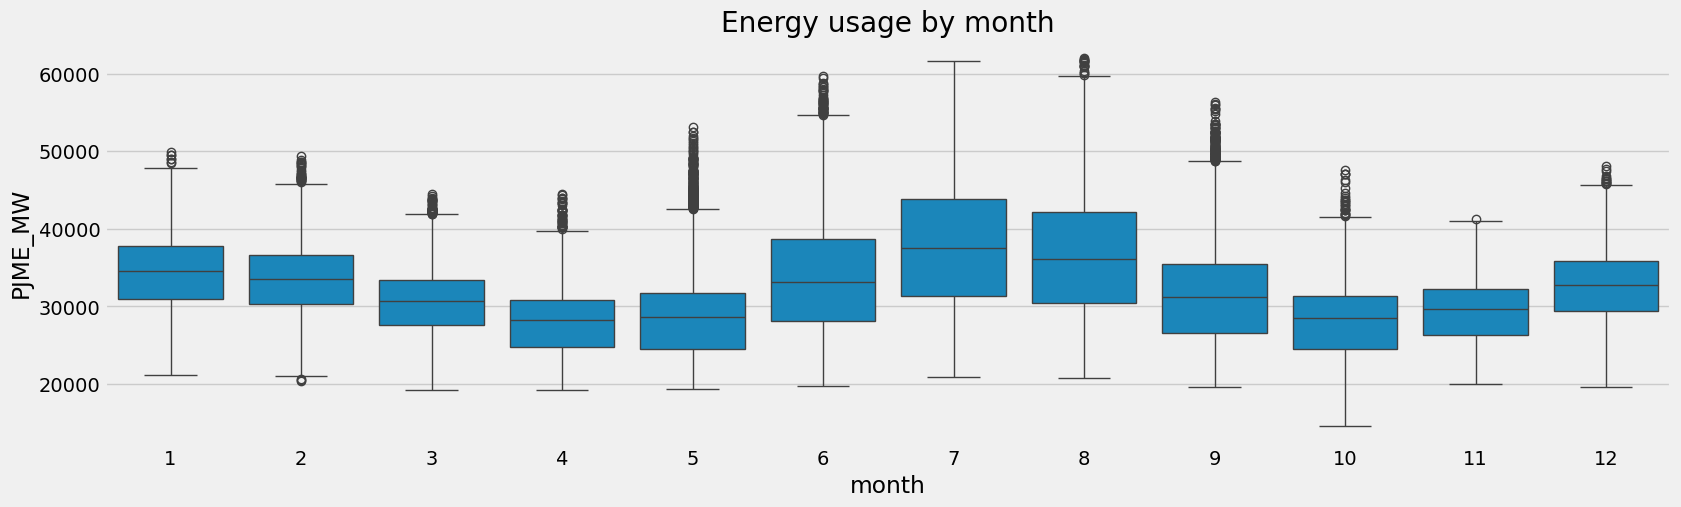

In [11]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=df,x='month',y='PJME_MW')
plt.title('Energy usage by month')

Text(0.5, 1.0, 'Energy usage by year')

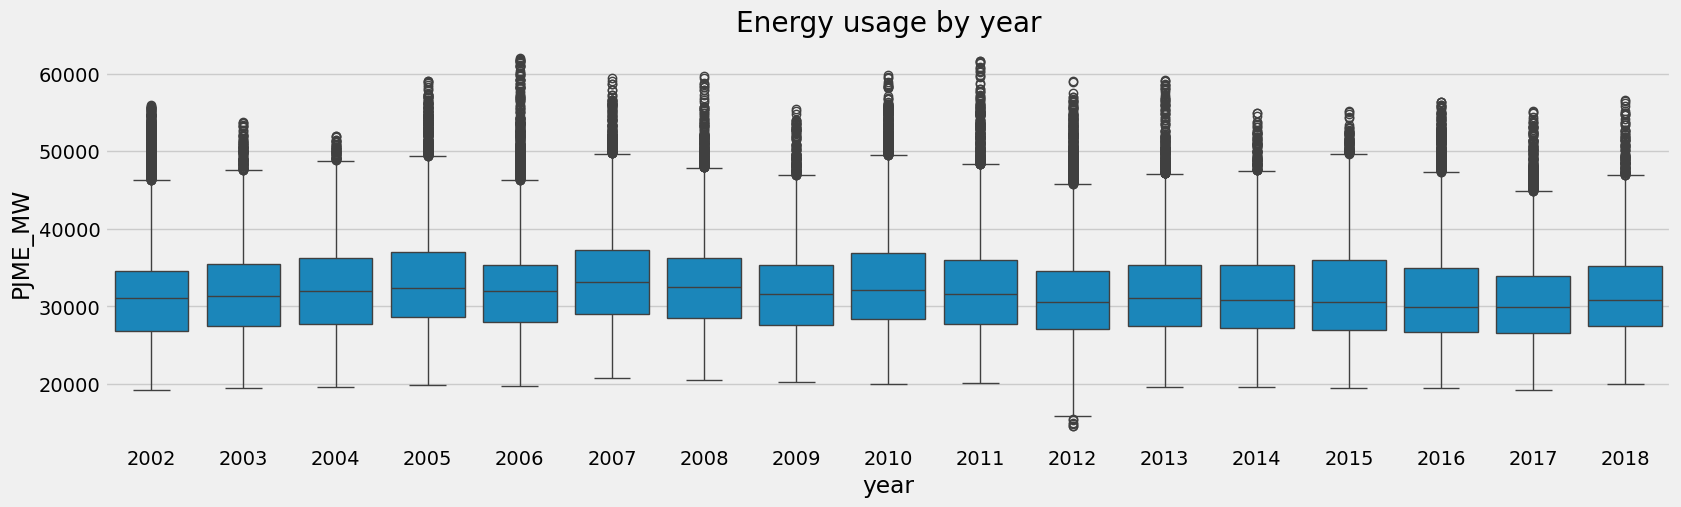

In [12]:
plt.subplots(figsize=(18,5))
sns.boxplot(data=df,x='year',y='PJME_MW')
plt.title('Energy usage by year')

Model

In [13]:
train_set=df.loc[df.index<"01-01-2015"]
test_set=df.loc[df.index>="01-01-2015"]

c:\Users\RPC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


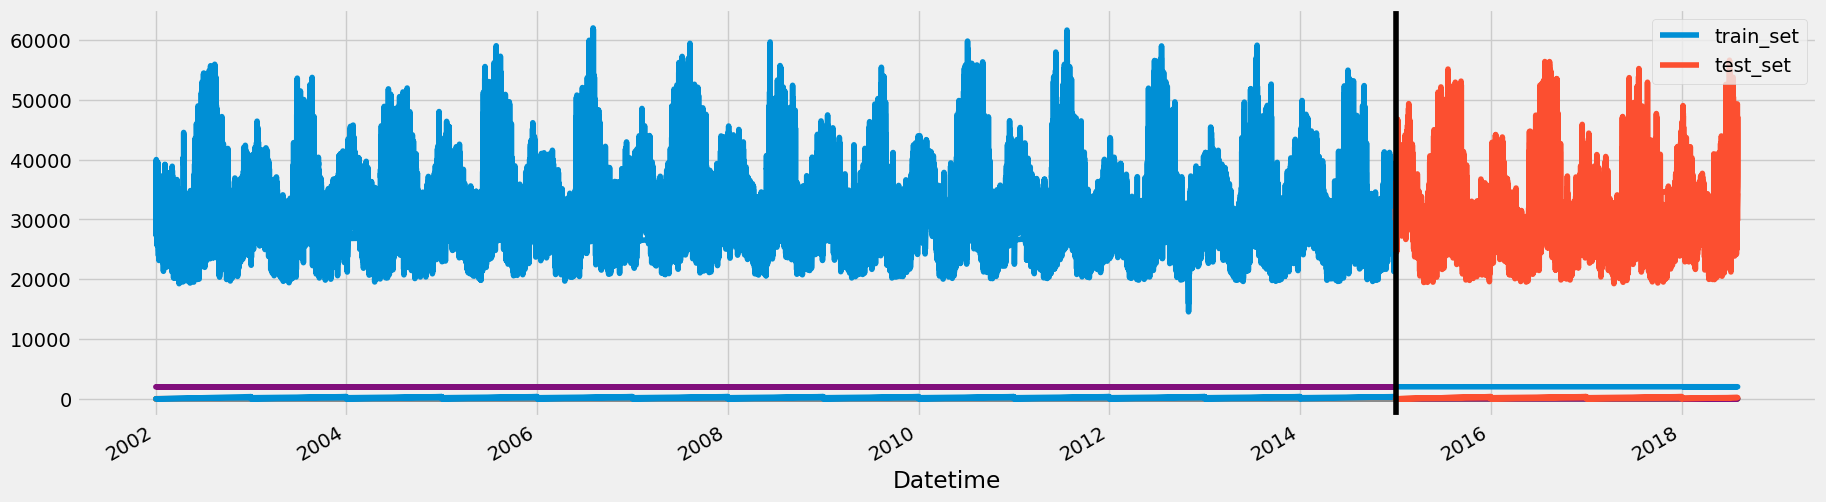

In [23]:
fig,ax=plt.subplots(figsize=(20,6))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015',color='black')
plt.legend(['train_set','test_set'])

In [44]:
x_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']

x_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [49]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

In [50]:
model.fit(x_train,y_train)

c:\Users\RPC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [51]:
model.score(x_train,y_train)

0.9324661462266746

In [55]:
pre=model.predict(x_test)
pre

array([30878.986, 29885.408, 28764.014, ..., 35979.44 , 33564.727,
       31884.342], dtype=float32)

In [57]:
mean_squared_error(pre,y_test)

17586869.156182434

In [58]:
np.sqrt(mean_squared_error(pre,y_test))

4193.67012963376